In [2]:
import sys
sys.path.append('../../')
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from Optimisation import HSS
from Trajectory import *
from IPython.display import HTML
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
data = np.load('../../Data/Mars/HSS_10_Traj.npy')
ntraj, nnodes, nfeat = data.shape
dataregres = data.reshape(ntraj*nnodes, nfeat)
iin  = [0,1,2,3,4]
iout = [5,6]
it   = [7]

In [7]:
for net in ['20x2','20x4','50x4']:
    root = '../../Data/Mars/Nets/Mars_Reg_New_' + net
    c    = np.load(root + '.mlp_costs.npy')
    tc   = np.load(root + '.mlp_test_costs.npy')
    print net
    print c[-1]
    print len(c)
    print tc[-1]
    print

20x2
0.179104
124425
0.256665

20x4
0.177432
81930
0.351694

50x4
0.260846
200000
3.48665



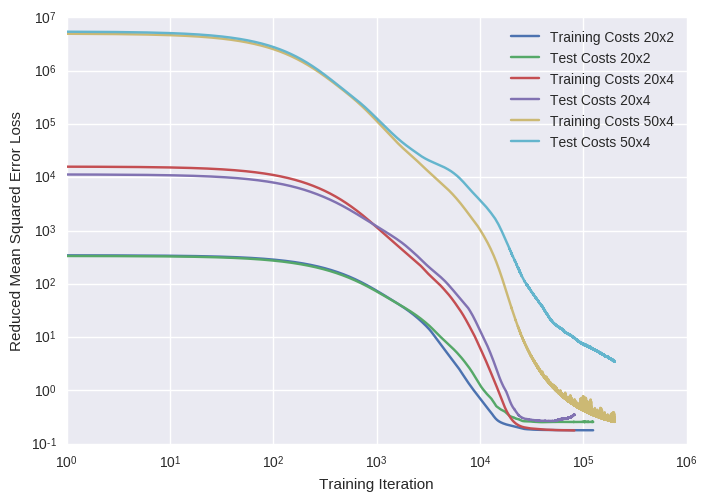

In [4]:
plt.close('all')

labels = []
for net in ['20x2','20x4','50x4']:
    root = '../../Data/Mars/Nets/Mars_Reg_New_' + net
    c    = np.load(root + '.mlp_costs.npy')
    tc   = np.load(root + '.mlp_test_costs.npy')
    plt.plot(c)
    plt.plot(tc)
    labels.append('Training Costs ' + net)
    labels.append('Test Costs ' + net)

plt.yscale('log')
plt.xscale('log')
plt.ylabel('Reduced Mean Squared Error Loss')
plt.xlabel('Training Iteration')
plt.legend(labels)
plt.savefig('../../Data/Figs/New/Training_Loss.pdf', format='pdf', transparent=True, bbox_inches='tight')
plt.show()

In [3]:
# Select randomly a few training trajectories
itraj = np.random.choice(range(ntraj),10)
test_si = data[itraj,0,0:5]

In [4]:
model = Point_Lander_Drag()
model.controller = Neural(model, 'HSS_10_Train', (20,4)).Control

In [5]:
# Time should not matter much
tf = 50
# The resolution of the integration
nnodes = 200
# We now propagate the model with the trained neural network
fsl = []
for si in test_si:
    s, c = model.Propagate.Neural(si, tf, nnodes, False)
    t = np.linspace(0,tf, nnodes).reshape(nnodes,1)
    fs = np.hstack((s,c,t))
    fsl.append(fs)
fsl = np.array(fsl)

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /home/cisprague/Documents/Dev/astro.iq/src/Data/ML/Nets/HSS_10_Train_20x4.mlp
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]

Caused by op u'save/RestoreV2', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-b964fd6c052f>", line 8, in <module>
    s, c = model.Propagate.Neural(si, tf, nnodes, False)
  File "../../Trajectory.py", line 286, in Neural
    control[0,:] = self.model.controller(state[0], bangbang, sess, True)
  File "../../Trajectory.py", line 371, in Control
    control = self.net.predict(state, sess, restore)
  File "../../ML.py", line 94, in predict
    saver = tf.train.Saver()
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 1000, in __init__
    self.build()
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 1030, in build
    restore_sequentially=self._restore_sequentially)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 624, in build
    restore_sequentially, reshape)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 361, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 200, in restore_op
    [spec.tensor.dtype])[0])
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_io_ops.py", line 441, in restore_v2
    dtypes=dtypes, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /home/cisprague/Documents/Dev/astro.iq/src/Data/ML/Nets/HSS_10_Train_20x4.mlp
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

plt.close('all')



fig, ax = plt.subplots(1,1)
Q = ax.quiver(x, y, ux, uy)

def update_quiver(num, Q, fsl):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """
    x = fsl[:,:num,0]
    y = fsl[:,:num,1]
    u = fsl[:,:num,5]
    ux = u*
    Q = ax.quiver(x, y, ux, uy)

    return Q,

update_quiver(10,Q,fsl)
#plt.show()

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
#anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, x, y, ux, uy),interval=10, blit=False)

#HTML(anim.to_html5_video())

SyntaxError: invalid syntax (<ipython-input-1-7f8eedf95fdd>, line 19)